In [1]:
import sys
import numpy as np

sys.path.insert(0, "..")

# Agents
from src.agents.exp3 import Exp3

# Adversaries
from src.adversaries.adversary import Adversary
from src.adversaries.entropy_based_adversary import EntropyBasedAdversary

# Environments
from src.environments.environment import Environment
from src.environments.adversarial_mab_env import Adversarial_MAB_env

# Adversarial MAB bandits
from src.adversarial_mab import AdversarialMultiArmedBandit

# Display
from src.display.visualization import Visualization as vis

In [2]:
# Init Vars
K = 10
h = 10000
epsilon = 0.0

# Init Agent
lr = np.sqrt(np.log(K) / (h * K))
ag = Exp3(K=K, lr=lr) 

# Calculate upper bound
bound_per_timestep = np.array([ag.compute_regret_bound(t) for t in range(h)])

## EntropybasedAdversary experiment

In [3]:
# Init Adversary
sigmas = [0.1, 0.2, 0.3]
deltas = [0.05]

# Init lists
data_labels = []
cumulative_regrets = []

for sigma in sigmas:
    for delta in deltas:
        # Init adversary
        adv = EntropyBasedAdversary(
            k=K, 
            n=h, 
            sigma=sigma,
            delta=delta
        )
        
        # Init environment
        adv_env = Adversarial_MAB_env(K=K, adversary=adv)
        
        # Play experiment
        num_sim = 100
        exp = AdversarialMultiArmedBandit()
        _, _, _, _, cumulative_regret, _, fixed_policy_regret = exp.play(agent=ag, environment=adv_env, num_sim=num_sim, horizon=h, k=K)
        
        # Append cumulative regret
        cumulative_regrets.append(fixed_policy_regret)
        data_labels.append(f"Sigma={sigma}, Delta={delta}")

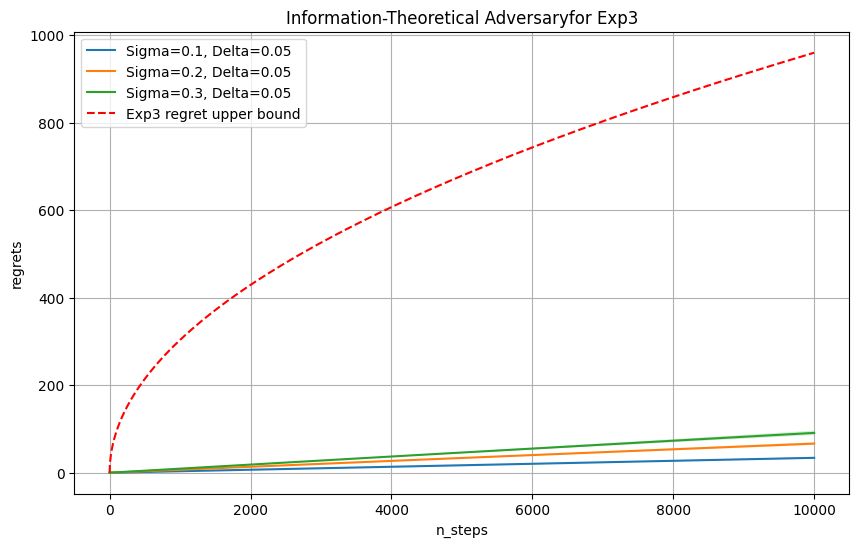

In [4]:
vis.plot_mean_std(
    data=cumulative_regrets, 
    data_labels=data_labels,
    title=f"Information-Theoretical Adversaryfor Exp3", 
    xlabel="n_steps", 
    ylabel="regrets", 
    baseline=bound_per_timestep,
    baseline_title=f"Exp3 regret upper bound"
)